#CARGA DE DATOS

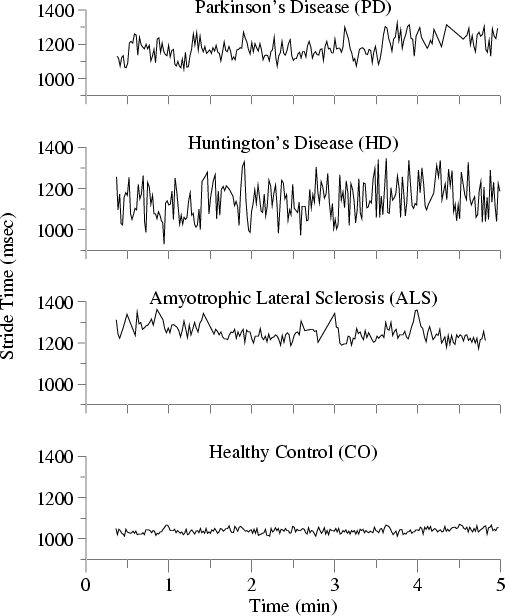

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

names= ['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 'Left Swing Interval (sec)',
'Right Swing Interval (sec)',	'Left Swing Interval (% of stride)', 'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)', 'Left Stance Interval (% of stride)',
'Right Stance Interval (% of stride)', 'Double Support Interval (sec)',	'Double Support Interval (% of stride)']

datos = pd.read_csv('als8.ts',delimiter='\t',names=names)



In [4]:
def hampelfilter(wk, K, FilterParms):
    """
    Procedure to implement the Hampel filter
    """
    #
    Thresh = FilterParms[0]
    ctr = wk#[K]
    ref = np.median(wk)

    AbsDev = abs(wk - ref)
    MAD = 1.4826 * np.median(AbsDev)
    TestVal = abs(ctr - ref)
    #if TestVal > Thresh * MAD:
    yk = ctr

    print("changing");
    numero = np.sum((TestVal > Thresh * MAD)==True)
    print(numero)

    yk[TestVal > Thresh * MAD] = ref


    return yk

In [ ]:
datos.head()

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,22.8900,1.1467,1.1667,0.4100,0.4033,35.76,34.57,0.7367,0.7633,64.24,65.43,0.3333,29.07
1,24.0133,1.1233,1.1333,0.4000,0.4167,35.61,36.76,0.7233,0.7167,64.39,63.24,0.3067,27.30
2,25.1867,1.1733,1.1267,0.4300,0.4067,36.65,36.09,0.7433,0.7200,63.35,63.91,0.3367,28.69
3,26.3200,1.1333,1.1633,0.3767,0.4067,33.24,34.96,0.7567,0.7567,66.76,65.04,0.3500,30.88
4,27.4500,1.1300,1.1400,0.3900,0.4033,34.51,35.38,0.7400,0.7367,65.49,64.62,0.3367,29.79


#Visualización y tratamiento de los datos

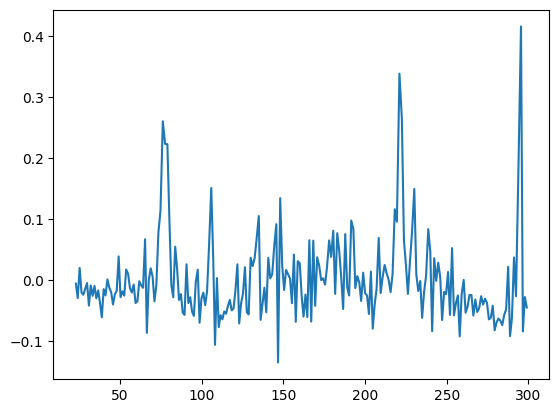

In [7]:
tiempo = datos['Elapsed Time (sec)'].values
lsi = datos['Left Stride Interval (sec)'].values
type(lsi)

#plt.plot(tiempo,lsi)
plt.plot(tiempo,signal.detrend(lsi))

changing
4


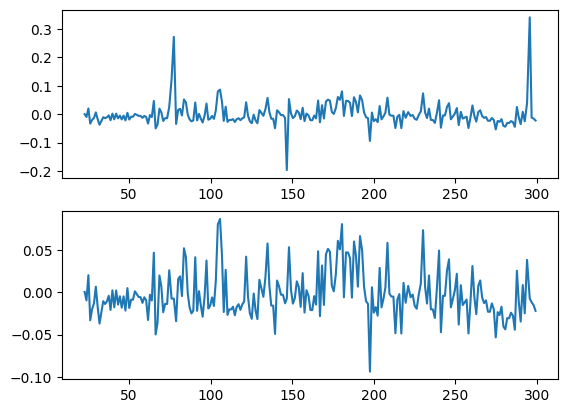

In [8]:
tiempo = datos['Elapsed Time (sec)'].values
lsi = signal.detrend(datos['Left Swing Interval (sec)'].values)

plt.subplot(2,1,1)
plt.plot(tiempo,lsi)

plt.subplot(2,1,2)
lsi = hampelfilter(lsi, 3, [6])
plt.plot(tiempo,lsi)

plt.show()

The self-information related value quantifies how much information or surprise levels are associated with one particular outcome.

This outcome is referred to as an event of a random variable.

The Shannon entropy quantifies the levels of “informative” or “surprising” the whole of the random variable would be and all its possible outcomes are averaged.

Information entropy is generally measured in terms of bits which are also known as Shannons or otherwise called bits and even as nats.

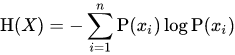

In [ ]:
#interpreting propabilities empirically
a = np.arange(5)
hist, bin_edges = np.histogram(a)
print(hist/a.shape[0])

[0.2 0.  0.2 0.  0.  0.2 0.  0.2 0.  0.2]


In [ ]:
def shannon_entropy(x):

  p , _ = np.histogram(x,bins='fd') #'fd' (estimador de Freedman Diaconis)
  p = p/len(p) #proportion

  h = -p*np.log2(p)

  h[np.isnan(h)] = 0.0
  H = np.sum(h)
  return H

In [ ]:
shannon_entropy(lsi)

<ipython-input-210-42ef8c3eb4e0>:6: RuntimeWarning: divide by zero encountered in log2
  h = -p*np.log2(p)
<ipython-input-210-42ef8c3eb4e0>:6: RuntimeWarning: invalid value encountered in multiply
  h = -p*np.log2(p)


-0.3810832282183102

[Profiling Python](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.07-Timing-and-Profiling.ipynb#scrollTo=jBOiwQso5HaA)

In [ ]:
#https://www.kaggle.com/code/tigurius/introduction-to-taken-s-embedding/notebook
def takensEmbedding (data, delay, dimension):
    "This function returns the Takens embedding of data with delay into dimension, delay*dimension must be < len(data)"
    if delay*dimension > len(data):
        raise NameError('Delay times dimension exceed length of data!')
    embeddedData = np.array([data[0:len(data)-delay*(dimension - 1)]])
    for i in range(1, dimension):
        embeddedData = np.append(embeddedData, [data[i*delay:len(data) - delay*(dimension - i - 1)]], axis=0)
    return embeddedData;

In [ ]:
reconstruccion = takensEmbedding([4,7,9,10,6,11,3], 1, 3)

In [ ]:
reconstruccion.shape

(3, 5)

In [ ]:
print(reconstruccion[:,0])

[4 7 9]


In [ ]:
%timeit
m_rank = np.argsort(reconstruccion, axis = 0, kind=None, order=None)
print(m_rank)

[[0 0 2 1 2]
 [1 1 0 0 0]
 [2 2 1 2 1]]


In [ ]:
%time
rank_pattern = np.array([0,1,2]);
copy_rank = np.tile(rank_pattern,(5,1))
print(copy_rank.transpose())

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]]


In [ ]:
resultado = copy_rank.transpose() - m_rank
print(resultado)

[[ 0  0 -2 -1 -2]
 [ 0  0  1  1  1]
 [ 0  0  1  0  1]]


In [ ]:
resultado = copy_rank.transpose() - m_rank
print(resultado[0,:])

[ 0  0 -2 -1 -2]


In [ ]:
print(resultado[1,:])

[0 0 1 1 1]


In [ ]:
print(sum(np.abs(resultado),0))

[0 0 4 2 4]


In [ ]:
print(np.shape(sum(np.abs(resultado),0))[0])

5


In [ ]:
total_pattern = np.shape(sum(np.abs(resultado),0))[0] - np.count_nonzero(sum(np.abs(resultado),0))
print(total_pattern)

2


In [ ]:
from itertools import permutations

dim = 3
tau = 1
a = np.arange(0,dim)

perms = set(permutations(a))
print(perms)

{(0, 2, 1), (1, 2, 0), (2, 1, 0), (2, 0, 1), (0, 1, 2), (1, 0, 2)}


In [ ]:
x = np.array([4,7,9,10,6,11,3])
x_embedding = takensEmbedding (lsi, tau, dim)
m_rank = np.argsort(x_embedding, axis = 0, kind=None, order=None)

print(x_embedding)

[[ 0.00046242 -0.00963502  0.02026755 -0.03312989 -0.01992733 -0.01332476
   0.0065778  -0.01691963 -0.03701707 -0.0237145  -0.01051194 -0.01390937
  -0.01070681 -0.00410424 -0.02090168  0.00230088 -0.01779655  0.00210601
  -0.01459142 -0.00468886 -0.01818629 -0.00488373 -0.02168116  0.0049214
  -0.01857603 -0.00867347 -0.00877091  0.00113166 -0.00226578 -0.00566321
  -0.00576065 -0.01255808 -0.00595552 -0.00945295 -0.03285039 -0.00294782
  -0.00974526  0.0468573  -0.04994013 -0.03663757  0.019865    0.00646756
  -0.02362987 -0.01372731 -0.01382474  0.02607782 -0.00744778 -0.00744778
  -0.03421449  0.01568808  0.01889064 -0.00450679  0.05209577  0.04199834
  -0.0014991  -0.01819653 -0.02499397 -0.0217914   0.04151116 -0.02198628
   0.00131629 -0.01548115 -0.02887858 -0.00567602  0.03752655 -0.01917089
  -0.01596832 -0.00606576 -0.01616319  0.01373937  0.08034193  0.0868445
   0.04344706 -0.02335037  0.02655219 -0.02684524 -0.02024268 -0.02034011
  -0.01713755 -0.02723498 -0.01733242 -0

In [ ]:
PEd = 0
for rank_pattern in perms:
  copy_rank = np.tile(rank_pattern,(230,1))
  resultado = copy_rank.transpose() - m_rank
  total_pattern = np.shape(sum(np.abs(resultado),0))[0] - np.count_nonzero(sum(np.abs(resultado),0))
  print(total_pattern)
  if total_pattern != 0:
    PEd = PEd + (total_pattern/230)*np.log2(total_pattern/230)
print(-PEd)

42
35
51
32
31
39
2.562852216388076


In [ ]:
x = np.array([4,7,9,10,6,11,3])

from itertools import permutations

dim = 3
tau = 1
a = np.arange(0,dim)

perms = set(permutations(a))
print(perms)

x_embedding = takensEmbedding (x, tau, dim)
m_rank = np.argsort(x_embedding, axis = 0, kind=None, order=None)
print(m_rank)
print(x_embedding)

{(0, 2, 1), (1, 2, 0), (2, 1, 0), (2, 0, 1), (0, 1, 2), (1, 0, 2)}
[[0 0 2 1 2]
 [1 1 0 0 0]
 [2 2 1 2 1]]
[[ 4  7  9 10  6]
 [ 7  9 10  6 11]
 [ 9 10  6 11  3]]


In [ ]:
PEd = 0
for rank_pattern in perms:
  copy_rank = np.tile(rank_pattern,(x_embedding.shape[1],1))
  resultado = copy_rank.transpose() - m_rank
  total_pattern = np.shape(sum(np.abs(resultado),0))[0] - np.count_nonzero(sum(np.abs(resultado),0))
  print(total_pattern)
  if total_pattern != 0:
    PEd = PEd + (total_pattern/x_embedding.shape[1])*np.log2(total_pattern/x_embedding.shape[1])
print(-PEd)

0
0
0
2
2
1
1.5219280948873621


In [ ]:
import numpy as np

X = np.asarray(x)
print(X.shape)


(7,)
